In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
sns.set_style('darkgrid')

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv('test.csv')

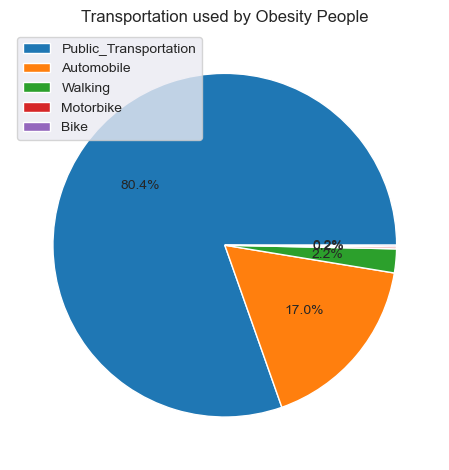

In [3]:
plt.pie(train['MTRANS'].value_counts(), autopct = '%1.1f%%')
plt.legend(train['MTRANS'].value_counts().index, loc = 'upper left')
plt.title('Transportation used by Obesity People')
plt.tight_layout()
plt.show()

In [4]:
### Body Mass Index
# A measure of Body fat based on weight and height.
train['BMI'] = train['Weight']/(train['Height']**2)
test['BMI'] = test['Weight']/(test['Height']**2)

### Meal Habits
# Number of health food in every single meal
train['meal_habits'] = train['FCVC'] * train['NCP']
test['meal_habits'] = test['FCVC'] * test['NCP']

### Tech usage score
# average time spent using technology relative to their age
train ['tech_usage_score'] = train['TUE']/train['Age']
test ['tech_usage_score'] = test['TUE']/test['Age']

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [6]:
X_train = train.drop('NObeyesdad', axis = 1)
y_train = train.NObeyesdad
X_test = test.drop('id', axis = 1)

cat = X_train.select_dtypes(include='object').columns
X_train_ = pd.get_dummies(X_train, columns = cat)
test= pd.get_dummies(X_test, columns = cat)

In [7]:
test

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,BMI,meal_habits,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,26.899886,1.848294,120.644178,2.938616,3.000000,2.825629,0.855400,0.000000,35.315411,8.815848,...,0,0,0,1,0,0,0,0,1,0
1,21.000000,1.600000,66.000000,2.000000,1.000000,3.000000,1.000000,0.000000,25.781250,2.000000,...,0,0,0,1,0,0,0,0,1,0
2,26.000000,1.643355,111.600553,3.000000,3.000000,2.621877,0.000000,0.250502,41.324115,9.000000,...,0,0,0,1,0,0,0,0,1,0
3,20.979254,1.553127,103.669116,2.000000,2.977909,2.786417,0.094851,0.000000,42.976937,5.955818,...,0,0,0,1,0,0,0,0,1,0
4,26.000000,1.627396,104.835346,3.000000,3.000000,2.653531,0.000000,0.741069,39.584143,9.000000,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,23.327836,1.721384,78.030383,2.813234,3.000000,1.000000,0.807076,0.778632,26.333478,8.439702,...,0,0,0,1,0,0,0,0,1,0
13836,29.000000,1.590000,62.000000,3.000000,3.000000,2.000000,0.000000,0.000000,24.524346,9.000000,...,0,0,0,1,0,0,0,0,1,0
13837,22.935612,1.585547,44.376637,3.000000,2.273740,2.000000,1.949840,1.000000,17.652091,6.821220,...,0,0,0,1,0,0,0,0,1,0
13838,21.000000,1.620000,53.000000,2.000000,3.000000,2.000000,3.000000,2.000000,20.195092,6.000000,...,0,0,0,0,1,0,0,0,1,0


In [11]:
X_train_['Age'] = np.log(X_train_['Age'])
test['Age'] = np.log(test['Age'])

X_train_['Weight'] = np.log(X_train_['Weight'])
test['Weight'] = np.log(test['Weight'])

X_train_['BMI'] = np.log(X_train_['Weight'])
test['BMI'] = np.log(test['BMI'])

Text(0.5, 1.0, 'Density plot of meal_habits')

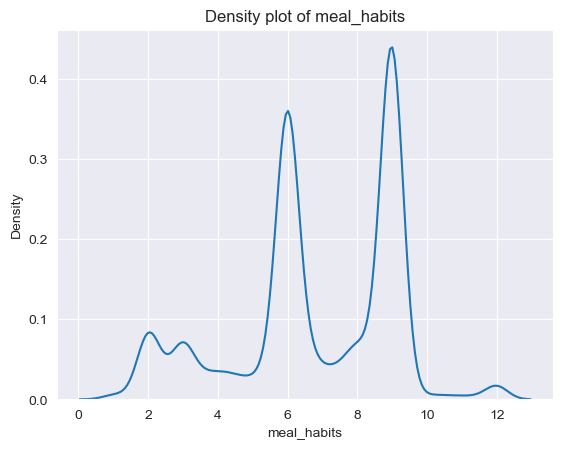

In [12]:
sns.kdeplot(X_train_,x= X_train_['meal_habits'])
plt.title('Density plot of meal_habits')

In [13]:
X_train_['meal_habits'] = np.log(X_train_['meal_habits'])
test['meal_habits']= np.log(test['meal_habits'])

In [14]:
y_enc = le.fit_transform(y_train)

In [15]:
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifier, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

lg = LogisticRegressionCV()


def acc_cv(model):
    acc = cross_val_score(model, X_train_, y_enc, scoring = 'accuracy', cv = 5)
    return acc

def acc_test(y, y_pred):
    acc_ = accuracy_score(y, y_pred)
    return acc_

In [16]:
alphas = [0.000005,0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,5]
rc_cv = [acc_cv(RidgeClassifier(alpha = a)).mean() for a in alphas]
rc_series =  pd.Series(rc_cv, index = alphas)
rc_series

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.30891e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.6923e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.76539e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.69256e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning

0.000005    0.712786
0.000100    0.712786
0.000500    0.712786
0.001000    0.712786
0.005000    0.712882
0.010000    0.712786
0.050000    0.710859
0.100000    0.709125
0.500000    0.696936
1.000000    0.686916
5.000000    0.663214
dtype: float64

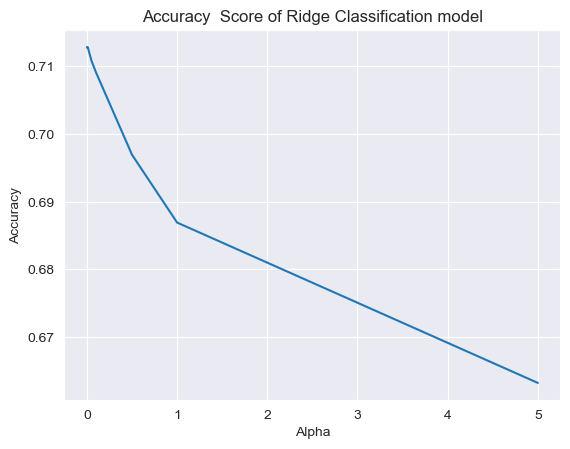

In [17]:
rc_series.plot(title = 'Accuracy  Score of Ridge Classification model')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.show()

### Stochastic Gradient Descent Classifier

In [18]:
sgd = SGDClassifier()
sgd_cv = [acc_cv(SGDClassifier(alpha = a)).mean() for a in alphas]
sgd_series = pd.Series(sgd_cv, index = alphas)
sgd_series

0.000005    0.159020
0.000100    0.203826
0.000500    0.177038
0.001000    0.184791
0.005000    0.191493
0.010000    0.183300
0.050000    0.177327
0.100000    0.142016
0.500000    0.190671
1.000000    0.163981
5.000000    0.149146
dtype: float64

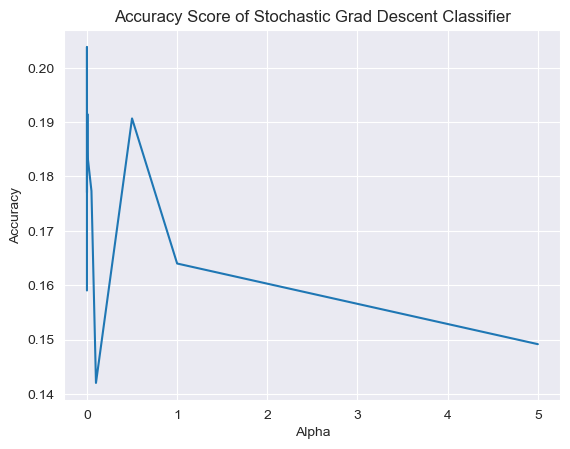

In [19]:
sgd_series.plot(title = 'Accuracy Score of Stochastic Grad Descent Classifier')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.show()

In [20]:
dtc = DecisionTreeClassifier()
dtc_cv = [acc_cv(DecisionTreeClassifier(ccp_alpha=a)).mean() for a in alphas]
dtc_series = pd.Series(dtc_cv, index=alphas)
dtc_series

0.000005    0.777481
0.000100    0.812696
0.000500    0.871568
0.001000    0.866461
0.005000    0.848252
0.010000    0.837798
0.050000    0.748772
0.100000    0.454765
0.500000    0.194913
1.000000    0.194913
5.000000    0.194913
dtype: float64

[]

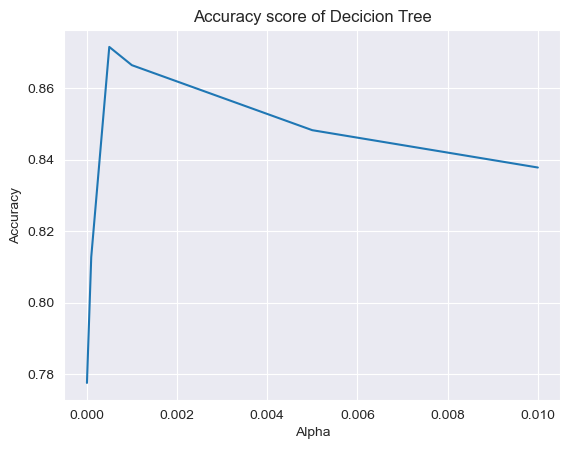

In [21]:
dtc_series.iloc[:6].plot(title = 'Accuracy score of Decicion Tree')
#dtc_series.plot(title = 'Accuracy score of Decicion Tree')
plt.xlabel("Alpha")
plt.ylabel('Accuracy')
plt.plot()

In [22]:
rfc = RandomForestClassifier()
rfc_cv = [acc_cv(RandomForestClassifier(ccp_alpha=a)).mean() for a in alphas]
rfc_series = pd.Series(rfc_cv, index = alphas)
rfc_series

0.000005    0.900039
0.000100    0.899027
0.000500    0.892186
0.001000    0.885635
0.005000    0.865402
0.010000    0.844880
0.050000    0.693517
0.100000    0.502456
0.500000    0.194913
1.000000    0.194913
5.000000    0.194913
dtype: float64

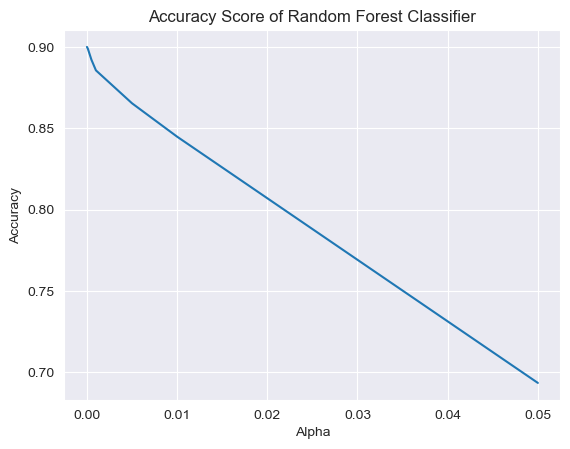

In [23]:
rfc_series.iloc[:7].plot(title = 'Accuracy Score of Random Forest Classifier')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
dtc = DecisionTreeClassifier(ccp_alpha=0.005).fit(X_train_, y_enc)
acc_cv(dtc).mean()

0.8482515065896326

In [ ]:
from xgboost import XGBClassifier
xgbc = XGBClassifier(max_depth = 8, booster = 'gbtree')

In [ ]:
from xgboost import plot_importance
xgbc_tr = xgbc.fit(X_train_, y_enc)

y_pred_xgb = xgbc_tr.predict(test)